In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp

In [2]:
def functionSig(x):
    return 1/(1+np.exp(-x))

In [3]:
def gradientSig(x):
    return np.exp(-x)/(1+np.exp(-x))**2

In [4]:
def calculateError(y1,y2,y3,counter):
    value = (functionSig(y1)-dataPointLabel[counter][0])**2 + (functionSig(y2)-dataPointLabel[counter][1])**2 + (functionSig(y3)-dataPointLabel[counter][2])**2
    return value

In [5]:
def gradientF(y,z):
    return 2*(functionSig(y)-z)

In [6]:
def functionGradient(y1,y2,y3,w,X,counter):
    d = [[gradientF(y1,dataPointLabel[counter][0])*gradientSig(y1)*X[1]*w[6][0]+ #W14
          gradientF(y2,dataPointLabel[counter][1])*gradientSig(y2)*X[1]*w[8][0]+
          gradientF(y3,dataPointLabel[counter][2])*gradientSig(y3)*X[1]*w[10][0]],
         [gradientF(y1,dataPointLabel[counter][0])*gradientSig(y1)*X[2]*w[6][0]+ #W24
          gradientF(y2,dataPointLabel[counter][1])*gradientSig(y2)*X[2]*w[8][0]+
          gradientF(y3,dataPointLabel[counter][2])*gradientSig(y3)*X[2]*w[10][0]],
         [gradientF(y1,dataPointLabel[counter][0])*gradientSig(y1)*X[3]*w[6][0]+ #W34
          gradientF(y2,dataPointLabel[counter][1])*gradientSig(y2)*X[3]*w[8][0]+
          gradientF(y3,dataPointLabel[counter][2])*gradientSig(y3)*X[3]*w[10][0]],
         [gradientF(y1,dataPointLabel[counter][0])*gradientSig(y1)*X[1]*w[7][0]+ #W15
          gradientF(y2,dataPointLabel[counter][1])*gradientSig(y2)*X[1]*w[9][0]+
          gradientF(y3,dataPointLabel[counter][2])*gradientSig(y3)*X[1]*w[11][0]],
         [gradientF(y1,dataPointLabel[counter][0])*gradientSig(y1)*X[2]*w[7][0]+ #W25
          gradientF(y2,dataPointLabel[counter][1])*gradientSig(y2)*X[2]*w[9][0]+
          gradientF(y3,dataPointLabel[counter][2])*gradientSig(y3)*X[2]*w[11][0]],
         [gradientF(y1,dataPointLabel[counter][0])*gradientSig(y1)*X[3]*w[7][0]+ #W35
          gradientF(y2,dataPointLabel[counter][1])*gradientSig(y2)*X[3]*w[9][0]+
          gradientF(y3,dataPointLabel[counter][2])*gradientSig(y3)*X[3]*w[11][0]],
         [gradientF(y1,dataPointLabel[counter][0])*gradientSig(y1)*X[4]], #W46
         [gradientF(y1,dataPointLabel[counter][0])*gradientSig(y1)*X[5]], #W56
         [gradientF(y2,dataPointLabel[counter][1])*gradientSig(y2)*X[4]], #W47
         [gradientF(y2,dataPointLabel[counter][1])*gradientSig(y2)*X[5]], #W57
         [gradientF(y3,dataPointLabel[counter][2])*gradientSig(y3)*X[4]], #W48
         [gradientF(y3,dataPointLabel[counter][2])*gradientSig(y3)*X[5]]] #W58
    D = np.array(d)
    return D

In [7]:
def calculateDandError(w):
    error = 0
    counter = 0
    test = 0
    D = np.array([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    for x in dataPointSet:
        xSet = []
        xSet.append([])
        xSet.append(x[0])
        xSet.append(x[1])
        xSet.append(x[2])
        x4 = x[0]*w[0][0] + x[1]*w[1][0] + x[2]*w[2][0]
        x5 = x[0]*w[3][0] + x[1]*w[4][0] + x[2]*w[5][0]
        xSet.append(x4)
        xSet.append(x5)
        y1 = x4*w[6][0] + x5*w[7][0]
        y2 = x4*w[8][0] + x5*w[9][0]
        y3 = x4*w[10][0] + x5*w[11][0]
        #print(y1,y2,y3)
        error += calculateError(y1,y2,y3,counter)
        D += functionGradient(y1,y2,y3,w,xSet,counter)
        counter+=1
    return -D, error

In [8]:
import random
teamNumber = 7
random.seed(teamNumber)
dataPointSet=[]
dataPointLabel=[]
N=100
M=3
while len(dataPointSet)<N:
    dataPointSet.append([])
    for j in range(M):
        dataPointSet[-1].append(random.random())
    
    x = dataPointSet[-1]
    if np.linalg.norm(x) == 1 or np.linalg.norm(x) == 1/2 or np.linalg.norm(x) == 0:
        dataPointSet.remove(x) #排除掉在圓線上的點
    elif np.linalg.norm(x) > 1:
        dataPointLabel.append([1,0,0])
    elif np.linalg.norm(x) < 1 and np.linalg.norm(x) > 1/2:
        dataPointLabel.append([0,1,0])
    else:
        dataPointLabel.append([0,0,1])
#print(dataPointLabel)
#print(dataPointSet)    

In [9]:
W = []
weight = []
random.seed(2022)
for i in range(4):
    W.append([])
    
for i in range(2): #W4 W5
    W.append([])
    for j in range(3):#裡面有三個
        W[-1].append(random.random())
        
for i in range(3): #W6 W7 W8
    W.append([])
    for j in range(2): #裡面有兩個
        W[-1].append(random.random())
        
for i in W:
    if i != []:
        for j in i:
            weight.append([j])
weight = np.array(weight)
print(weight)

[[0.53162575]
 [0.44260596]
 [0.31005357]
 [0.06078985]
 [0.78362533]
 [0.98202775]
 [0.41236764]
 [0.63404358]
 [0.81087921]
 [0.86108239]
 [0.76100064]
 [0.30859988]]


In [10]:
k=0 #k:迭代次數
dk=[] #存每個迭代的方向向量
valuek=[] #存每個迭代的functionValue
wk=[]
        
wk.append(weight)
D,E = calculateDandError(weight)
dk.append(D)
while np.linalg.norm(dk[k]) > 1e-6 and k <=150:
    valuek.append(E)
    wk.append(wk[k] + 0.001*dk[k])
    k += 1
    D,E = calculateDandError(wk[k])
    dk.append(D)
valuek.append(E)
print(valuek)

    

[110.04685107994874, 108.12410855798201, 106.25598216159747, 104.44815749409952, 102.70506660758231, 101.02990045122027, 99.4246741222493, 97.89033119258593, 96.42687295842504, 95.03349972490396, 93.70875353560689, 92.45065446888293, 91.25682527544636, 90.12460142802725, 89.05112545815943, 88.03342575045863, 87.06848080623904, 86.15327046470662, 85.28481577625921, 84.46020924424391, 83.67663705823016, 82.93139478522913, 82.22189780138902, 81.54568755886123, 80.90043460468873, 80.28393910800158, 79.69412951146776, 79.12905980311277, 78.58690580403616, 78.0659607842304, 77.56463065038827, 77.08142889402178, 76.61497144334399, 76.16397152633412, 75.72723462364277, 75.30365356715139, 74.8922038219658, 74.49193897548035, 74.10198644614137, 73.72154341605945, 73.349872985171, 72.98630053983584, 72.63021032525586, 72.28104220865937, 71.93828861860513, 71.60149164486134, 71.27024028297483, 70.94416780776068, 70.62294926042696, 70.30629903483528, 69.99396854942759, 69.68574399257456, 69.3814441

In [11]:
optimalW = wk[-1]
finalZ = []
counter = 0
for x in dataPointSet:
        finalZ.append([])
        x4 = x[0]*optimalW[0][0] + x[1]*optimalW[1][0] + x[2]*optimalW[2][0]
        x5 = x[0]*optimalW[3][0] + x[1]*optimalW[4][0] + x[2]*optimalW[5][0]
        
        y1 = x4*optimalW[6][0] + x5*optimalW[7][0]
        y2 = x4*optimalW[8][0] + x5*optimalW[9][0]
        y3 = x4*optimalW[10][0] + x5*optimalW[11][0]
        #print(y1,y2,y3)
        Y = []
        Y1 = functionSig(y1)
        Y2 = functionSig(y2)
        Y3 = functionSig(y3)
        Y.append([0])
        Y.append(Y1)
        Y.append(Y2)
        Y.append(Y3)
        if max(Y) == Y[1]:
            Y[1] = 1
            Y[2] = Y[3] = 0
            finalZ[counter].append(Y[1])
            finalZ[counter].append(Y[2])
            finalZ[counter].append(Y[3])
        elif max(Y) == Y[2]:
            Y[2] = 1
            Y[1] = Y[3] = 0
            finalZ[counter].append(Y[1])
            finalZ[counter].append(Y[2])
            finalZ[counter].append(Y[3])
        elif max(Y) == Y[3]:
            Y[3] = 1
            Y[1] = Y[2] = 0
            finalZ[counter].append(Y[1])
            finalZ[counter].append(Y[2])
            finalZ[counter].append(Y[3])
        counter+=1
print(finalZ)

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]

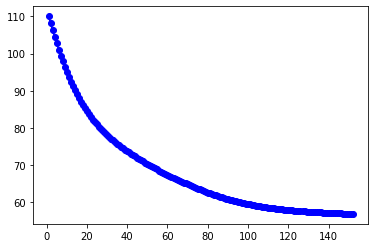

In [12]:
X = []
for i in range(152):
    X.append(i+1)
plt.plot(X,valuek,marker="o",color="blue")